In [1]:
 
# LIBRERIAS PHYTON
# 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold  # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model


In [5]:
#Abrimos el Archivo que vamos a analizar
with  open("C:\\Users\\omoya\\Documents\\maestria\\proyectofinal\\wdbc.data") as Archivo_Inf:
        
        
# Nombramos a df el archivo en csv y validamos si tiene encabezados      
        df=pd.read_csv(Archivo_Inf,header= None)

# Colocamos al Csv los encabezados
        
        headers = ['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se', 'symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']
        df.columns=headers

In [6]:
# imprimimos la imformacion para saber como quedo el archivo
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
# df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [8]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
# Leemos el df para determinar los caracteres de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.fillna(0,inplace= True )




In [11]:
#df['Bare Nuclei']=df['Bare Nuclei'].apply(lambda x: x if x!='?'   else 0)


In [12]:
#Trasformamos el archivo en  entero para poder correr el modelo
df=df.astype('int')

In [13]:
#Leemos el archivo para ver el cambio
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   id                       569 non-null    int32
 1   diagnosis                569 non-null    int32
 2   radius_mean              569 non-null    int32
 3   texture_mean             569 non-null    int32
 4   perimeter_mean           569 non-null    int32
 5   area_mean                569 non-null    int32
 6   smoothness_mean          569 non-null    int32
 7   compactness_mean         569 non-null    int32
 8   concavity_mean           569 non-null    int32
 9   concave points_mean      569 non-null    int32
 10  symmetry_mean            569 non-null    int32
 11  fractal_dimension_mean   569 non-null    int32
 12  radius_se                569 non-null    int32
 13  texture_se               569 non-null    int32
 14  perimeter_se             569 non-null    int32
 15  area_s

In [14]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17,10,122,1001,0,0,0,0,...,25,17,184,2019,0,0,0,0,0,0
1,842517,1,20,17,132,1326,0,0,0,0,...,24,23,158,1956,0,0,0,0,0,0
2,84300903,1,19,21,130,1203,0,0,0,0,...,23,25,152,1709,0,0,0,0,0,0
3,84348301,1,11,20,77,386,0,0,0,0,...,14,26,98,567,0,0,0,0,0,0
4,84358402,1,20,14,135,1297,0,0,0,0,...,22,16,152,1575,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21,22,142,1479,0,0,0,0,...,25,26,166,2027,0,0,0,0,0,0
565,926682,1,20,28,131,1261,0,0,0,0,...,23,38,155,1731,0,0,0,0,0,0
566,926954,1,16,28,108,858,0,0,0,0,...,18,34,126,1124,0,0,0,0,0,0
567,927241,1,20,29,140,1265,0,0,0,0,...,25,39,184,1821,0,0,0,0,0,0


In [15]:
# like this we also don't want the Id column for our analysis
#df.drop("Sample code number",axis=1,inplace=True)
df.drop("id",axis=1,inplace=True)

In [16]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17,10,122,1001,0,0,0,0,0,...,25,17,184,2019,0,0,0,0,0,0
1,1,20,17,132,1326,0,0,0,0,0,...,24,23,158,1956,0,0,0,0,0,0
2,1,19,21,130,1203,0,0,0,0,0,...,23,25,152,1709,0,0,0,0,0,0
3,1,11,20,77,386,0,0,0,0,0,...,14,26,98,567,0,0,0,0,0,0
4,1,20,14,135,1297,0,0,0,0,0,...,22,16,152,1575,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21,22,142,1479,0,0,0,0,0,...,25,26,166,2027,0,0,0,0,0,0
565,1,20,28,131,1261,0,0,0,0,0,...,23,38,155,1731,0,0,0,0,0,0
566,1,16,28,108,858,0,0,0,0,0,...,18,34,126,1124,0,0,0,0,0,0
567,1,20,29,140,1265,0,0,0,0,0,...,25,39,184,1821,0,0,0,0,0,0


In [17]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [19]:
# As I said above the data can be divided into three parts.lets divied the features according to their category
features_mean= list(df.columns[1:11])
features_se= list(df.columns[11:20])
features_worst=list(df.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [20]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [21]:
df.describe()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.0,569.0,569.0,569.0,569.0,...,569.000000,569.000000,569.000000,569.000000,569.0,569.000000,569.000000,569.0,569.0,569.0
mean,0.372583,13.637961,18.785589,91.485062,654.504394,0.0,0.0,0.0,0.0,0.0,...,15.785589,25.193322,106.811951,880.244288,0.0,0.001757,0.005272,0.0,0.0,0.0
std,0.483918,3.565143,4.323177,24.322877,352.048943,0.0,0.0,0.0,0.0,0.0,...,4.854547,6.155659,33.624084,569.523885,0.0,0.041922,0.072483,0.0,0.0,0.0
min,0.000000,6.000000,9.000000,43.000000,143.000000,0.0,0.0,0.0,0.0,0.0,...,7.000000,12.000000,50.000000,185.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
25%,0.000000,11.000000,16.000000,75.000000,420.000000,0.0,0.0,0.0,0.0,0.0,...,13.000000,21.000000,84.000000,515.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
50%,0.000000,13.000000,18.000000,86.000000,551.000000,0.0,0.0,0.0,0.0,0.0,...,14.000000,25.000000,97.000000,686.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
75%,1.000000,15.000000,21.000000,104.000000,782.000000,0.0,0.0,0.0,0.0,0.0,...,18.000000,29.000000,125.000000,1084.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
max,1.000000,28.000000,39.000000,188.000000,2501.000000,0.0,0.0,0.0,0.0,0.0,...,36.000000,49.000000,251.000000,4254.000000,0.0,1.000000,1.000000,0.0,0.0,0.0


In [22]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17,10,122,1001,0,0,0,0,0,...,25,17,184,2019,0,0,0,0,0,0
1,1,20,17,132,1326,0,0,0,0,0,...,24,23,158,1956,0,0,0,0,0,0
2,1,19,21,130,1203,0,0,0,0,0,...,23,25,152,1709,0,0,0,0,0,0
3,1,11,20,77,386,0,0,0,0,0,...,14,26,98,567,0,0,0,0,0,0
4,1,20,14,135,1297,0,0,0,0,0,...,22,16,152,1575,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21,22,142,1479,0,0,0,0,0,...,25,26,166,2027,0,0,0,0,0,0
565,1,20,28,131,1261,0,0,0,0,0,...,23,38,155,1731,0,0,0,0,0,0
566,1,16,28,108,858,0,0,0,0,0,...,18,34,126,1124,0,0,0,0,0,0
567,1,20,29,140,1265,0,0,0,0,0,...,25,39,184,1821,0,0,0,0,0,0


In [23]:
data=df[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']]

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   diagnosis               569 non-null    int32
 1   radius_mean             569 non-null    int32
 2   texture_mean            569 non-null    int32
 3   perimeter_mean          569 non-null    int32
 4   area_mean               569 non-null    int32
 5   smoothness_mean         569 non-null    int32
 6   compactness_mean        569 non-null    int32
 7   concavity_mean          569 non-null    int32
 8   concave points_mean     569 non-null    int32
 9   symmetry_mean           569 non-null    int32
 10  fractal_dimension_mean  569 non-null    int32
dtypes: int32(11)
memory usage: 24.6 KB


In [25]:
data.shape

(569, 11)

In [26]:
#y

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

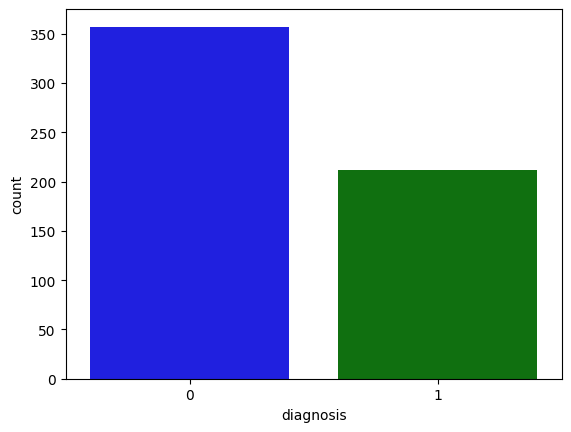

In [27]:
import seaborn as sns
#sns.countplot(y,label="Count")

sns.countplot(x="diagnosis",data=data,label="count",palette={"blue","green"})

#sns.countplot(x="Class",data=data,label="count",palette={"blue","red"})



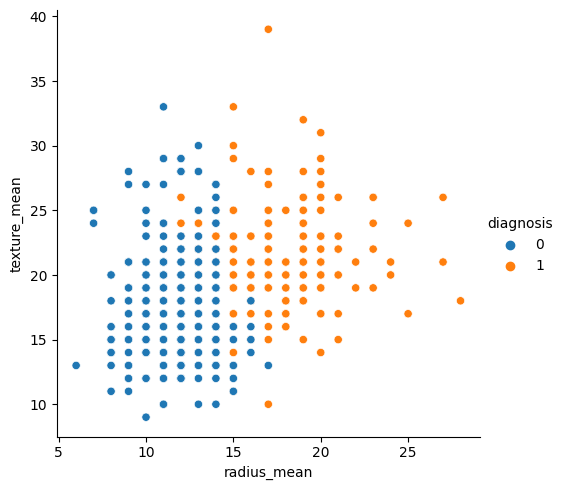

In [28]:
#sns.pairplot(data=data,hue="diagnosis")
sns.relplot(x="radius_mean",y="texture_mean",data=data,hue="diagnosis")



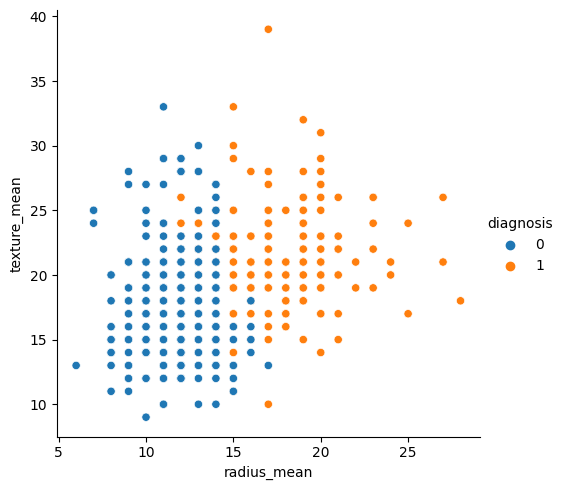

In [29]:
sns.relplot (x="radius_mean",y="texture_mean",data=data,hue="diagnosis")

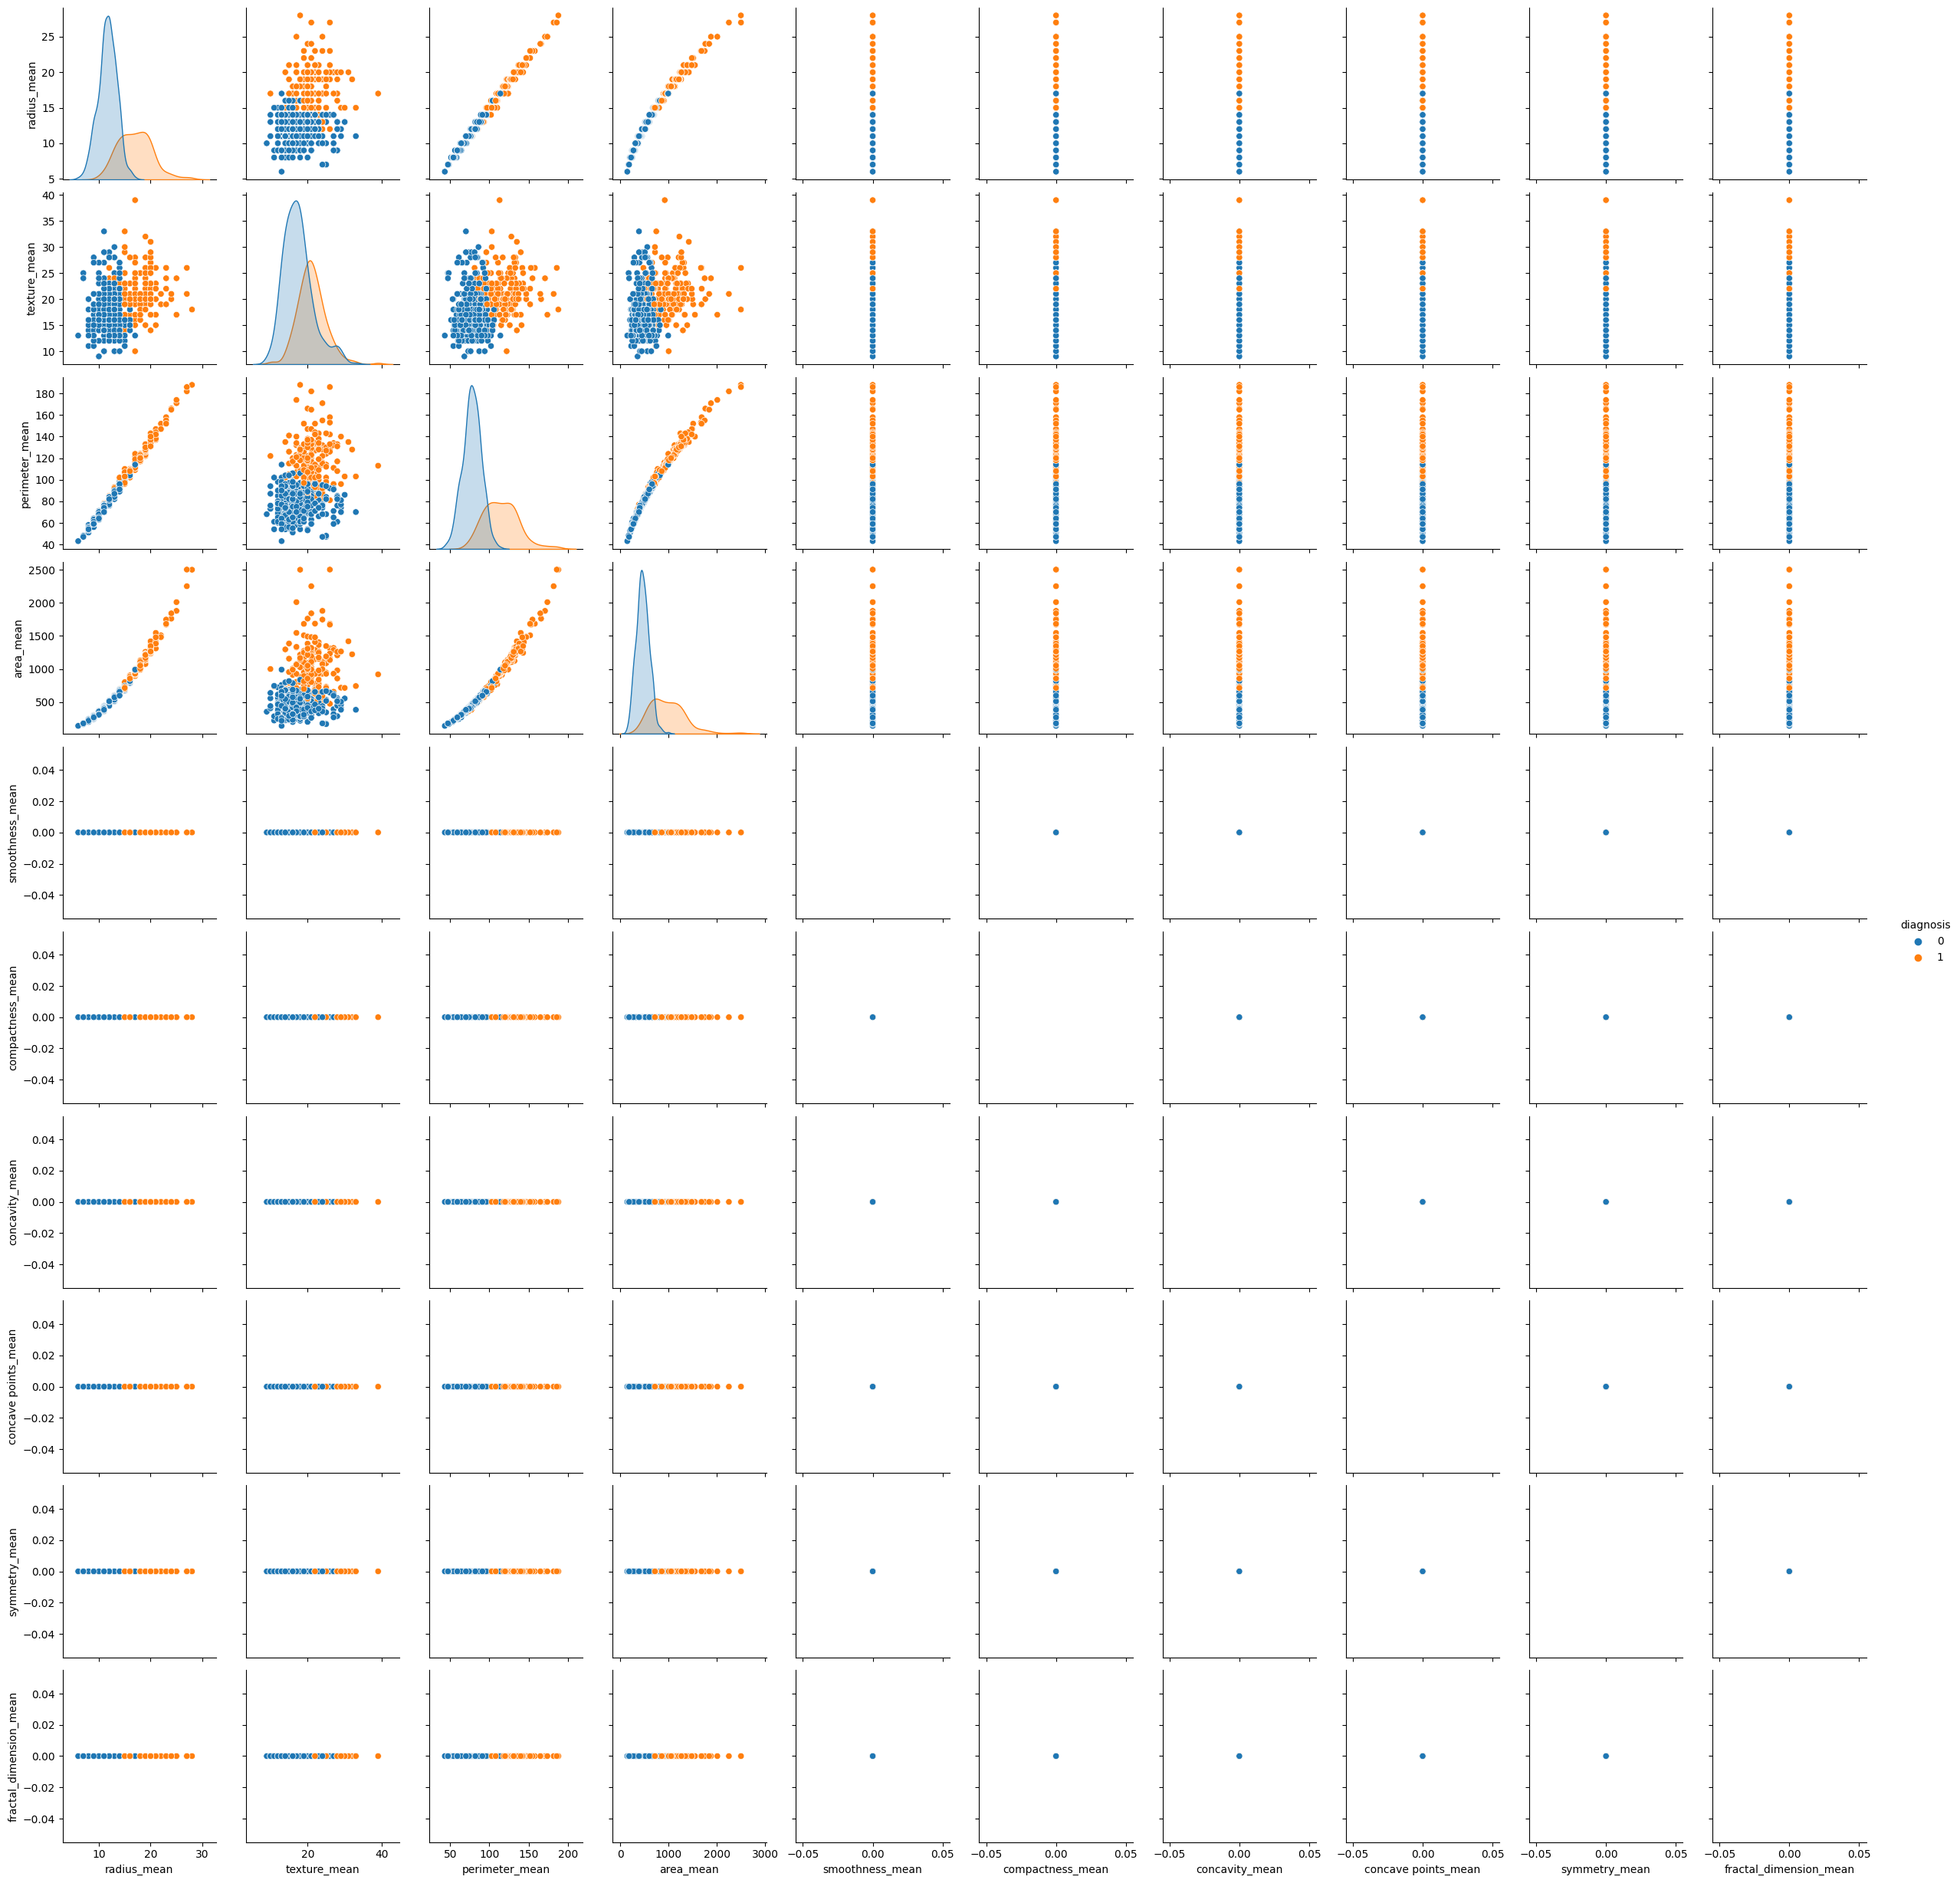

In [30]:
sns.pairplot(data=data,hue="diagnosis")


In [34]:
x=data[['radius_mean','texture_mean','perimeter_mean']]
y=data ['diagnosis']

In [35]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3, random_state=42)

In [36]:
# For chapter 4
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For chapter 5
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import time

# For chapter 6
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [37]:
#Escalonamiento de datos.
# Consultar si es parte del modelo 
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

In [38]:
#Modelo 1 
clf = SGDClassifier(loss="log")
clf.fit(trainX, trainY)

C:\Users\omoya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log')

In [39]:
y_pred = clf.predict(testX)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.91


In [40]:
#MATRIZ DE CONFUSION FIN DEL PRIMER MOEDLO
from sklearn.metrics import confusion_matrix
confusion_matrix(testY,y_pred)

array([[106,   2],
       [ 14,  49]], dtype=int64)

In [41]:
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import precision_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [42]:
X = df[df.columns.drop("diagnosis")]
y = df["diagnosis"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test_copy = X_test.copy()
y_test_copy = y_test.copy()

# oversampler = SMOTE(sampling_strategy=0.4)
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversampler.fit_resample(X_train, y_train)
X_test, y_test = oversampler.fit_resample(X_test, y_test)

In [ ]:
pca = PCA(n_components=3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   diagnosis                569 non-null    int32
 1   radius_mean              569 non-null    int32
 2   texture_mean             569 non-null    int32
 3   perimeter_mean           569 non-null    int32
 4   area_mean                569 non-null    int32
 5   smoothness_mean          569 non-null    int32
 6   compactness_mean         569 non-null    int32
 7   concavity_mean           569 non-null    int32
 8   concave points_mean      569 non-null    int32
 9   symmetry_mean            569 non-null    int32
 10  fractal_dimension_mean   569 non-null    int32
 11  radius_se                569 non-null    int32
 12  texture_se               569 non-null    int32
 13  perimeter_se             569 non-null    int32
 14  area_se                  569 non-null    int32
 15  smooth

In [45]:
#Trasformamos el archivo en  entero para poder correr el modelo
df=df.astype('int')

In [49]:
df.info

<bound method DataFrame.info of      diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1           17            10             122       1001   
1            1           20            17             132       1326   
2            1           19            21             130       1203   
3            1           11            20              77        386   
4            1           20            14             135       1297   
..         ...          ...           ...             ...        ...   
564          1           21            22             142       1479   
565          1           20            28             131       1261   
566          1           16            28             108        858   
567          1           20            29             140       1265   
568          0            7            24              47        181   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0                  0    

In [57]:
from sklearn.decomposition import PCA


In [58]:
pca = PCA(n_components=3)


In [59]:
pca.fit(X_train)

PCA(n_components=3)

In [60]:
from sklearn import tree
from dtreeviz.trees import dtreeviz
 


In [61]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import graphviz


In [62]:
def draw_tree(X, y, tree: DecisionTreeClassifier):
    viz = dtreeviz(tree, X, y,
                   target_name="diagnosis",
                   feature_names=[str(x) for x in range(X.shape[1])],
                   class_names=list(map(str, list(set(y)))))
    return viz


3


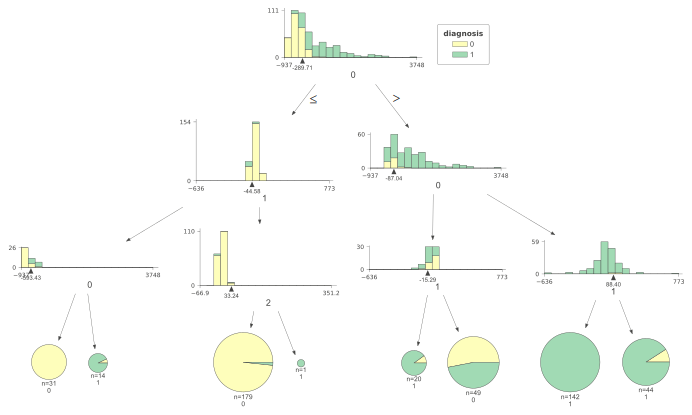

In [63]:
#MODELO 2 
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(pca.transform(X_train), y_train)
print(clf.get_depth())
viz = draw_tree(pca.transform(X_train), y_train, clf)
viz

In [64]:
y_pred = clf.predict(testX)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))


Accuracy: 0.37


In [65]:
#MATRIZ DE CONFUSION FIN DEL segundo MOEDLO
from sklearn.metrics import confusion_matrix
confusion_matrix(testY,y_pred)  # modelo con prediccion en falso negativos alta


array([[  0, 108],
       [  0,  63]], dtype=int64)

In [66]:
# Tercer Modelo 


#clf(pca.transform(X_train), y_train, pca.transform(X_test), y_test, RandomForestClassifier(max_depth=3))
clf = RandomForestClassifier(max_depth=9)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)





C:\Users\omoya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


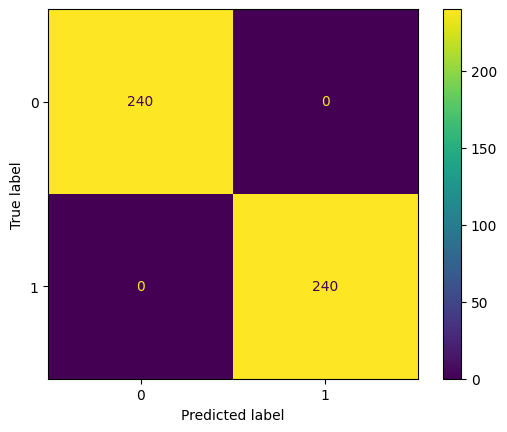

In [67]:
plot_confusion_matrix(clf, X_train, y_train)


In [68]:
y_pred = clf.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred))) # MOdelo mas preciso por que accuracy se acerca mas al 1 (100%)

Accuracy: 0.97


In [69]:
# MODELO 4
clf = KNeighborsClassifier (n_neighbors=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


C:\Users\omoya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


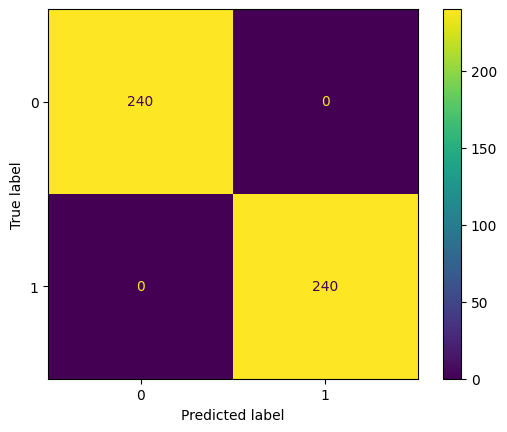

In [70]:
plot_confusion_matrix(clf, X_train, y_train)

In [71]:
y_pred = clf.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred))) # MOdelo mas preciso por que accuracy se acerca mas al 1 (100%)

Accuracy: 0.93
